<a href="https://colab.research.google.com/github/mehrankhosrojerdi/Diffusion_model/blob/main/annni_model_rbf_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install numpy
! python -m pip install scipy
! pip install numba
! pip install cytoolz
! pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"
! pip install psutil
! pip install cotengra
! pip installautoray
! pip install --no-deps -U git+https://github.com/jcmgray/quimb.git@main


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:00
  Cloning https://github.com/tqdm/tqdm.git (to revision devel) to /tmp/pip-install-3arr5idz/tqdm_e54d9e8d24fc4c99809ac4affe1719d2
  Running command git clone --filter=blob:none --quiet https://github.com/tqdm/tqdm.git /tmp/pip-install-3arr5idz/tqdm_e54d9e8d24fc4c99809ac4affe1719d2
  Running command git checkout -b devel --track origin/devel
  Switched to a new branch 'devel'
  Branch 'devel' set up to track remote branch 'devel' from 'origin'.
  Resolved https://github.com/tqdm/tqdm.git to commit 6ce50bedb3c525f762258fb0701aacae15515f4d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tqdm: filename=tqdm-4.66.1.dev2+g6ce50be-py3-none-any.whl size=78482 sha256=233945ee77397d71df637e5d791b1012c881444b87bf91ffff08da2c58f5e749
  Stored in directory: /tmp/pip-ephem-wheel-cache-hrxdco6i/wheels/58/37/2e/a68b55bd

In [3]:
import numpy as np
import quimb as qu
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

/usr/local/lib/python3.10/dist-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


Here we just try to realize have the boundry works and we try to define them

<ipython-input-9-41c5e9d20e62>:2: RuntimeWarning: divide by zero encountered in divide
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )
<ipython-input-9-41c5e9d20e62>:2: RuntimeWarning: invalid value encountered in multiply
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )
<ipython-input-9-41c5e9d20e62>:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )


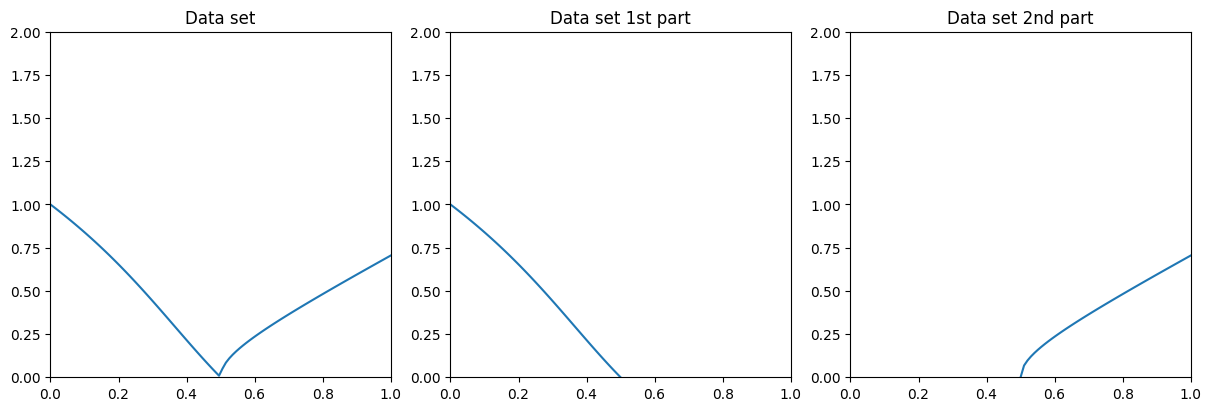

In [9]:
x = np.linspace(0.001,1,100)
y = np.where(x<0.5,(((1-x)/x)*(1-np.sqrt((1-(3*x)+(4*(x**2)))/(1-x)))) ,(1.05*(np.sqrt((x-0.5)*(x-0.1)))) )

x_1st = np.linspace(0.001, 0.5, 50)
def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

x_2nd = np.linspace(0.5, 1, 50)
def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y_2nd = np.array(hC_k(x_2nd))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(12, 4))
ax1.plot(x,y)
ax1.set_ylim(0.0, 2.0)
ax1.set_xlim(0.0, 1.0)
ax2.plot(x_1st,y_1st)
ax2.set_ylim(0.0, 2.0)
ax2.set_xlim(0.0, 1.0)
ax3.plot(x_2nd,y_2nd)
ax3.set_ylim(0.0, 2.0)
ax3.set_xlim(0.0, 1.0)
ax1.set_title("Data set");  ax2.set_title("Data set 1st part");  ax3.set_title("Data set 2nd part")
plt.show()

Here base on the bundries we try to produce dataset in each of these three zone

<ipython-input-73-22699f0db855>:5: RuntimeWarning: divide by zero encountered in divide
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-73-22699f0db855>:5: RuntimeWarning: invalid value encountered in multiply
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-73-22699f0db855>:6: RuntimeWarning: invalid value encountered in sqrt
  hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))


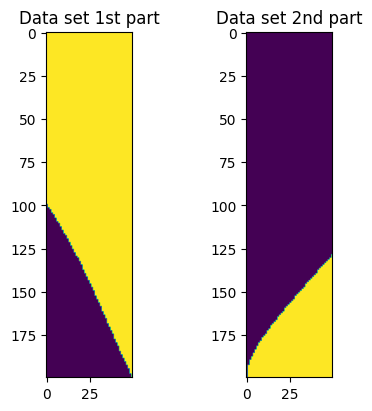

In [73]:
x1 = np.linspace(0.001,1,200)
x_1st = np.linspace(0.001, 0.5, 50)
x_2nd = np.linspace(0.5, 1, 50)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y_2nd = np.array(hC_k(x_2nd))

lst_f_1st =[]
for i in y_1st:
  for j in x2:
    if j<i:
      f = -1
    else:
      f = 0
    lst_f_1st.append(f)
array_form_1st = np.array(lst_f_1st)
re_array_form_1st = np.rot90(array_form_1st.reshape(x_1st.shape[0],x2.shape[0]),1)


lst_f_2nd =[]
for i in y_2nd:
  for j in x2:
    if j<i:
      f = 1
    else:
      f = 0
    lst_f_2nd.append(f)
array_form_2nd = np.array(lst_f_2nd)
re_array_form_2nd = np.rot90(array_form_2nd.reshape(x_2nd.shape[0],x2.shape[0]),1)


fig, (ax2, ax3) = plt.subplots(1, 2, constrained_layout=True, figsize=(4, 4))
ax2.imshow(re_array_form_1st)
ax3.imshow(re_array_form_2nd)
ax1.set_title("Data set");  ax2.set_title("Data set 1st part");  ax3.set_title("Data set 2nd part")
plt.show()

<ipython-input-69-b149b4703107>:6: RuntimeWarning: divide by zero encountered in divide
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-69-b149b4703107>:6: RuntimeWarning: invalid value encountered in multiply
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-69-b149b4703107>:7: RuntimeWarning: invalid value encountered in sqrt
  hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))


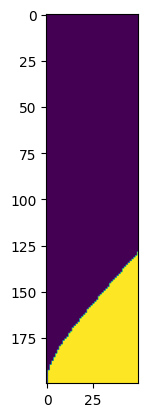

In [69]:
# dataset
x1 = np.linspace(0.001,1,200)
x_1st = np.linspace(0.001, 0.5, 50)
x_2nd = np.linspace(0.5, 1, 50)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y_2nd = np.array(hC_k(x_2nd))

lst_f_2nd =[]
for i in y_2nd:
  for j in x2:
    if j<i:
      f = 1
    else:
      f = 0
    lst_f_2nd.append(f)
array_form_2nd = np.array(lst_f_2nd)
re_array_form_2nd = np.rot90(array_form_2nd.reshape(x_2nd.shape[0],x2.shape[0]),1)
plt.imshow(re_array_form_2nd)
plt.show()

In [64]:
y=np.array([1.2,2.9,32,4.5,50.2])
y.shape

(5,)

<ipython-input-67-ee3de0ba2f07>:6: RuntimeWarning: divide by zero encountered in divide
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-67-ee3de0ba2f07>:6: RuntimeWarning: invalid value encountered in multiply
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-67-ee3de0ba2f07>:7: RuntimeWarning: invalid value encountered in sqrt
  hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))
<ipython-input-67-ee3de0ba2f07>:10: RuntimeWarning: divide by zero encountered in divide
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
<ipython-input-67-ee3de0ba2f07>:10: RuntimeWarning: invalid value encountered in multiply
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))


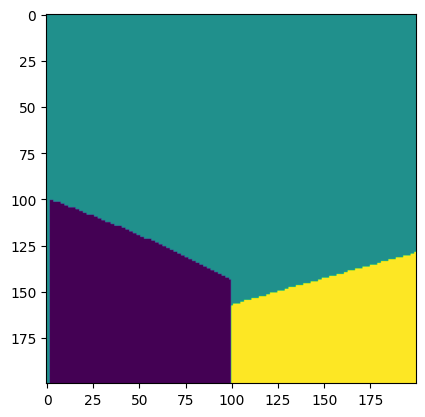

In [67]:
# dataset
x1 = np.linspace(0.001,1,200)
x_1st = np.linspace(0.0, 0.5, 100)
x_2nd = np.linspace(0.5, 1, 100)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y_2nd = np.array(hC_k(x_2nd))

lst_f = []
for i in x1:
    if i < 0.5:
        for j in x2:
            if j <= y_1st[int(i * (x_1st.shape[0] - 1))]:
                f = -1
            else:
                f = 0
            lst_f.append(f)
    else:
        for j in x2:
            if j <= y_2nd[int(i * (x_2nd.shape[0] - 1))]:
                f = 1
            else:
                f = 0
            lst_f.append(f)

array_form = np.array(lst_f)
re_array_form = np.rot90(array_form.reshape(x2.shape[0], x1.shape[0]), 1)
plt.imshow(re_array_form)
plt.show()

<ipython-input-77-d0d1591e72a4>:6: RuntimeWarning: divide by zero encountered in divide
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-77-d0d1591e72a4>:6: RuntimeWarning: invalid value encountered in multiply
  hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
<ipython-input-77-d0d1591e72a4>:7: RuntimeWarning: invalid value encountered in sqrt
  hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))


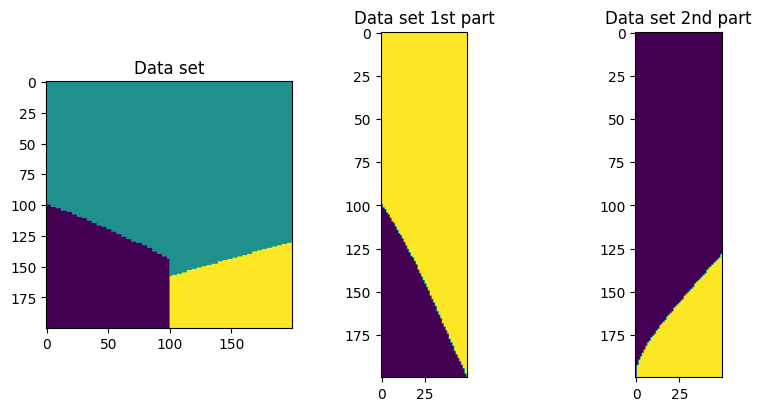

In [77]:
# dataset
x1 = np.linspace(0.001,1,200)
x_1st = np.linspace(0.001, 0.5, 50)
x_2nd = np.linspace(0.5, 1, 50)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))
hC_k = (1.05*(np.sqrt((x1-0.5)*(x1-0.1))))

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

def hC_k(x):
  return (1.05*(np.sqrt((x-0.5)*(x-0.1))))
y_2nd = np.array(hC_k(x_2nd))

lst_f_1st =[]
for i in y_1st:
  for j in x2:
    if j<i:
      f = -1
    else:
      f = 0
    lst_f_1st.append(f)
array_form_1st = np.array(lst_f_1st)
re_array_form_1st = np.rot90(array_form_1st.reshape(x_1st.shape[0],x2.shape[0]),1)

lst_f_2nd =[]
for i in y_2nd:
  for j in x2:
    if j<i:
      f = 1
    else:
      f = 0
    lst_f_2nd.append(f)
array_form_2nd = np.array(lst_f_2nd)
re_array_form_2nd = np.rot90(array_form_2nd.reshape(x_2nd.shape[0],x2.shape[0]),1)

lst_f = []
for i in x1:
    if i < 0.5:
        for j in x2:
            if j <= y_1st[int(i * (x_1st.shape[0] - 1))]:
                f = -1
            else:
                f = 0
            lst_f.append(f)
    else:
        for j in x2:
            if j <= y_2nd[int(i * (x_2nd.shape[0] - 1))]:
                f = 1
            else:
                f = 0
            lst_f.append(f)

array_form = np.array(lst_f)
re_array_form = np.rot90(array_form.reshape(x2.shape[0],x1.shape[0]),1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(8, 4))
ax1.imshow(re_array_form); ax2.imshow(re_array_form_1st); ax3.imshow(re_array_form_2nd)
ax1.set_title("Data set");  ax2.set_title("Data set 1st part");  ax3.set_title("Data set 2nd part")
plt.show()


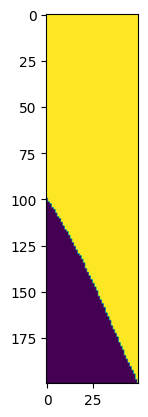

In [22]:
x_1st = np.linspace(0.001, 0.5, 50)
x2 = np.linspace(0.001, 2, 200)
def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))
y_1st = np.array(hI_k(x_1st))

lst_f =[]
for i in y_1st:
  for j in x2:
    if j<i:
      f = -1
    else:
      f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = np.rot90(array_form.reshape(x_1st.shape[0],x2.shape[0]),1)
plt.imshow(re_array_form)
plt.show()

In [ ]:
x1 = np.linspace(0.001, 0.5, 50)
x2 = np.linspace(0.001, 2, 200)

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))

lst_f = []

for
for _ in hI_k(x1):
  for j in x2:
    if j< _:
      f = -1
    else:
      f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = array_form.reshape(x1.shape[0],x2.shape[0])
plt.imshow(re_array_form)
plt.show()

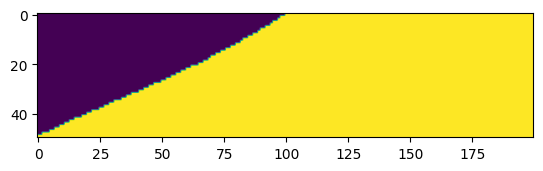

In [10]:
x1 = np.linspace(0.001, 0.5, 50)
x2 = np.linspace(0.001, 2, 200)

def hI_k(x):
  return (((1 - x) / x) * (1 - np.sqrt((1 - (3 * x) + (4 * (x ** 2))) / (1 - x))))

lst_f = []

for
for _ in hI_k(x1):
  for j in x2:
    if j< _:
      f = -1
    else:
      f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = array_form.reshape(x1.shape[0],x2.shape[0])
plt.imshow(re_array_form)
plt.show()

In [ ]:
# dataset
x1 = np.linspace(0.001,0.5,50)
x2 = np.linspace(0.001,2,200)
hI_k = (((1-x1)/x1)*(1-np.sqrt((1-(3*x1)+(4*(x1**2)))/(1-x1))))



lst_f = []
for i in x1:
  for j in x2:
    if j < hI_k[int(x1[i])]:
        f = -1
    else:
        f = 0
    lst_f.append(f)
array_form = np.array(lst_f)
re_array_form = array_form.reshape(x1.shape[0],x2.shape[0])
plt.imshow(re_array_form)
plt.show()

IndexError: ignored

Example 3: make a model by rbf kernel

In [ ]:
# dataset
x1 = np.linspace(0.001,1,200)
x2 = np.linspace(0.001,2,200)
lst_x =[]
for i in x1:
  for j in x2:
    lst_x.append(i)
    lst_x.append(j)

x = np.array(lst_x).reshape(40000,2)
y = np.array(lst_f)

In [ ]:
# svc model
clf= svm.SVC(kernel="rbf", gamma=0.7, C=10)

In [ ]:
# fitting
clf.fit(x, y)

SVC(C=10, gamma=0.7)

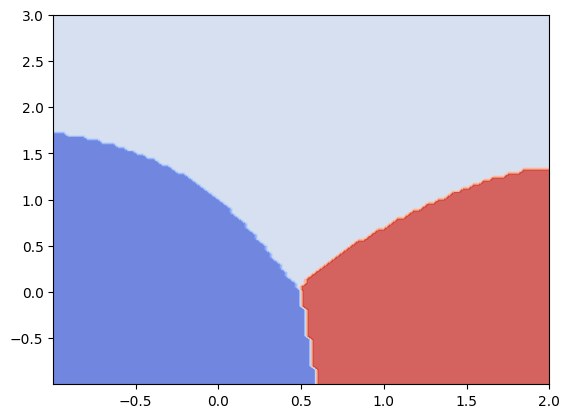

In [ ]:
# displying
isp = DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
)